##  Download history data from yahoo finance

In [370]:
# The first the step is to download history data from yahoo finance.
# Install yahoo finance package 

In [371]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [372]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np 
import pandas as pd
import plotly.graph_objs as go
import scipy
import statsmodels as sm
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler

import re
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor 
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras.models import Sequential
from keras.layers import LSTM
from scipy.stats import kurtosis
from scipy.stats import skew

In [373]:
###  Change 1

### To Get Reproducible Results with Keras
##Seed Random Numbers with the TensorFlow Backend
## Keras does get its source of randomness from the NumPy random number generator, so this must be seeded regardless of whether you are using a Theano or TensorFlow backend.
!pip install tensorflow

from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

In [374]:
# Select Symbol from the list

MyTicker = yf.Ticker("AMZN")

In [375]:
# Question 1: Write about stock, you can get stock information from yahoo
#print(MyTicker.info)
## More options: https://github.com/ranaroussi/yfinance

In [376]:
# get historical market data from yahoo finance
data_s = MyTicker.history(period="max")
data_s['Date'] = data_s.index

In [377]:
# Getting the historical daily returns of the index
sp500_dailyreturns = data_s['Close'].pct_change()
print(sp500_dailyreturns.describe())

count    6515.000000
mean        0.001705
std         0.036092
min        -0.247661
25%        -0.013295
50%         0.000402
75%         0.014805
max         0.344714
Name: Close, dtype: float64


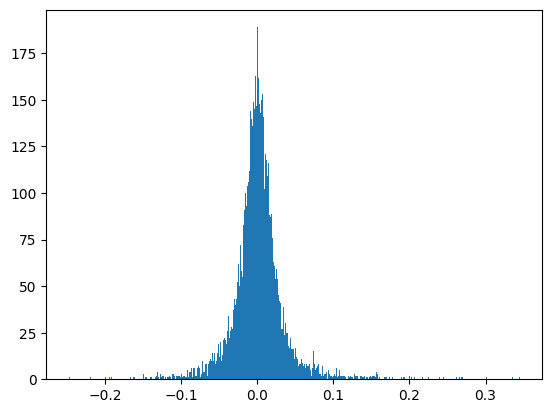

In [378]:
#Ploting the distribution of the daily returns to get some insights
plt.hist(sp500_dailyreturns, bins = 500)
plt.show()

In [379]:
# calculate basic statistical measures
mean = sp500_dailyreturns.mean()
std_dev = sp500_dailyreturns.std()
median = sp500_dailyreturns.median()
skewness = sp500_dailyreturns.skew()
kurtosis = sp500_dailyreturns.kurtosis()

# print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Median:", median)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Mean: 0.0017046750156108157
Standard Deviation: 0.03609239725973552
Median: 0.0004020646112508075
Skewness: 1.047620273920392
Kurtosis: 10.820423511930153


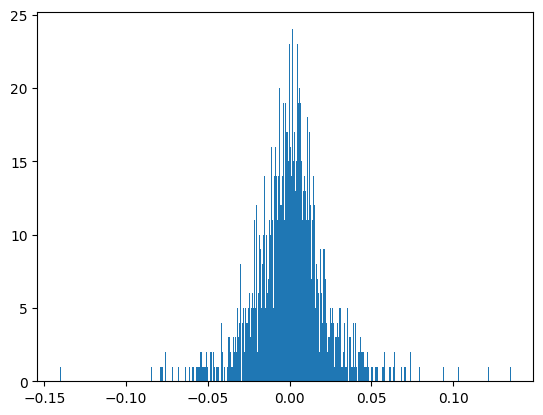

In [380]:
#Plotting the distribution of the daily returns of the index but only in the last 5 years to analyse the difference between the long and short term
sp500_dailyreturns_last1260 = sp500_dailyreturns.tail(1260)
plt.hist(sp500_dailyreturns_last1260, bins = 500)
plt.show()

In [381]:
# calculate basic statistical measures
mean = sp500_dailyreturns_last1260.mean()
std_dev = sp500_dailyreturns_last1260.std()
median = sp500_dailyreturns_last1260.median()
skewness = sp500_dailyreturns_last1260.skew()
kurtosis = sp500_dailyreturns_last1260.kurtosis()

# print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Median:", median)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Mean: 0.0005444566360075054
Standard Deviation: 0.022750963401431856
Median: 0.0009189839610768136
Skewness: 0.06852115328221058
Kurtosis: 4.087842928443674


In [382]:
# Question 2: check data and provide statistical description of stock price, Explain?
import pandas as pd
pd.set_option('display.max_columns',500) # To be able to see all the columns of the describe method
print(data_s.describe())

              Open         High          Low        Close        Volume  \
count  6516.000000  6516.000000  6516.000000  6516.000000  6.516000e+03   
mean     31.611626    31.991995    31.193432    31.599740  1.425338e+08   
std      48.095343    48.659651    47.464476    48.060258  1.401619e+08   
min       0.070313     0.072396     0.065625     0.069792  9.744000e+06   
25%       1.998875     2.028500     1.964750     2.001250  6.888182e+07   
50%       6.456750     6.535500     6.353250     6.444250  1.059050e+08   
75%      38.451375    38.688000    38.203001    38.464625  1.607700e+08   
max     187.199997   188.654007   184.839493   186.570496  2.086584e+09   

       Dividends  Stock Splits  
count     6516.0   6516.000000  
mean         0.0      0.004144  
std          0.0      0.252960  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0     20.000000  


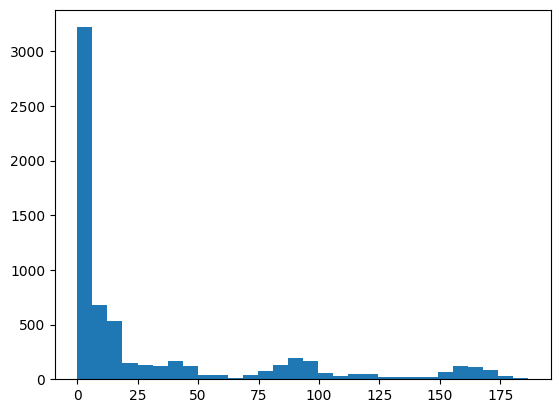

In [383]:
#Ploting the distribution of the daily close prices to get some insights
plt.hist(data_s['Close'], bins = 30)
plt.show()

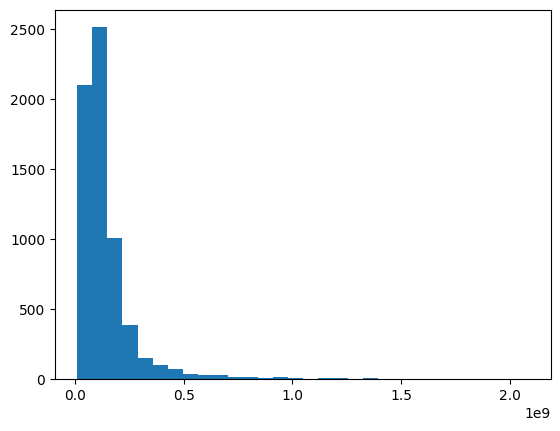

In [384]:
#Ploting the distribution of the daily close prices to get some insights
plt.hist(data_s['Volume'], bins = 30)
plt.show()

C:\Users\csman\AppData\Local\Temp\ipykernel_17816\843581453.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

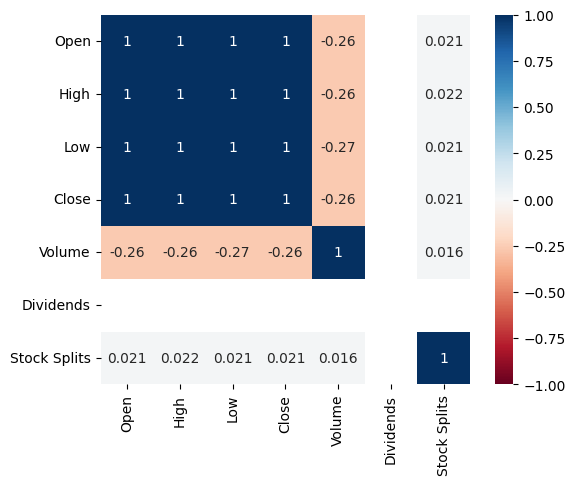

In [385]:
#Correlation Matrix of the historical data
import seaborn as sns
sns.heatmap(data_s.corr(),vmax=1, vmin=-1, square=True,annot=True,cmap='RdBu')

In [386]:
#Checking the correlation between close prices and volume of trading
volprice_corr = data_s['Close'].corr(data_s['Volume'])
print(volprice_corr)

-0.26411960375092997


## Analysis of time series of Stock Price

In [387]:
# Extracting Date, Open, High, Low and Close from the Dataframe.
data = data_s[['Date','Close','Open', 'High', 'Low','Volume']]

In [388]:
pip install nbformat>=4.2.0


Note: you may need to restart the kernel to use updated packages.


In [389]:
# Plot time series the close price and volume of stock price 
# Question 3: Explain the time series plots and try to identify important events
  
fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= data['Close'])])
fig.update_layout(title="Closing price",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()

fig=go.Figure(data=[go.Scatter(name = 'Volume',x= data['Date'],y= data['Volume'])])
fig.update_layout(title="Volume",xaxis_title="Date", yaxis_title="Volume")
fig.show()


In [390]:
data = data_s[['Date','Close']]
print(data.head(2))
print(data.tail(2))

                                               Date     Close
Date                                                         
1997-05-15 00:00:00-04:00 1997-05-15 00:00:00-04:00  0.097917
1997-05-16 00:00:00-04:00 1997-05-16 00:00:00-04:00  0.086458
                                               Date       Close
Date                                                           
2023-04-04 00:00:00-04:00 2023-04-04 00:00:00-04:00  103.949997
2023-04-05 00:00:00-04:00 2023-04-05 00:00:00-04:00  101.099998


### Test of stationarity

In [391]:
## Test of stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [392]:
### Question 4: Explain the assuption of Augmented Dickey-Fuller test and ADF test statistic test

In [393]:
### Question 5: What is unit root?

In [394]:
### Question 6: Check the stationary property of stock price and explain your finding

adf_test(data_s['Close'])


Augmented Dickey-Fuller Test: 
ADF test statistic        -0.445788
p-value                    0.902169
# lags used               34.000000
# observations          6481.000000
critical value (1%)       -3.431359
critical value (5%)       -2.861986
critical value (10%)      -2.567007
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [395]:
# Question 7: Calculate the first difference of stock price and Check the stationary property of the data
from statsmodels.tsa.statespace.tools import diff
change= diff(data_s['Close'],k_diff=1)
adf_test(change)


Augmented Dickey-Fuller Test: 
ADF test statistic     -1.369063e+01
p-value                 1.346079e-25
# lags used             3.500000e+01
# observations          6.479000e+03
critical value (1%)    -3.431360e+00
critical value (5%)    -2.861986e+00
critical value (10%)   -2.567008e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [396]:
pip install nbformat>=4.2.0


Note: you may need to restart the kernel to use updated packages.


In [397]:
#Question 8: Plot time series the first difference of stock price and explain your finding
fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= change)])
fig.update_layout(title="First difference closing price",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()



In [398]:
# Check the stationary property of the first difference of stock price
adf_test(change)

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.369063e+01
p-value                 1.346079e-25
# lags used             3.500000e+01
# observations          6.479000e+03
critical value (1%)    -3.431360e+00
critical value (5%)    -2.861986e+00
critical value (10%)   -2.567008e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [399]:
# Cutting the data:
dfs = data.loc[data['Date'] > '2015']
dfs = dfs.loc[data['Date'] <'2020']
dfs.head(1)

,Date,Close
Date,,
2015-01-02 00:00:00-05:00,2015-01-02 00:00:00-05:00,15.426


In [400]:
dfs.tail(-1)

,Date,Close
Date,,
2015-01-05 00:00:00-05:00,2015-01-05 00:00:00-05:00,15.109500
2015-01-06 00:00:00-05:00,2015-01-06 00:00:00-05:00,14.764500
2015-01-07 00:00:00-05:00,2015-01-07 00:00:00-05:00,14.921000
2015-01-08 00:00:00-05:00,2015-01-08 00:00:00-05:00,15.023000
2015-01-09 00:00:00-05:00,2015-01-09 00:00:00-05:00,14.846500
...,...,...
2019-12-24 00:00:00-05:00,2019-12-24 00:00:00-05:00,89.460503
2019-12-26 00:00:00-05:00,2019-12-26 00:00:00-05:00,93.438499
2019-12-27 00:00:00-05:00,2019-12-27 00:00:00-05:00,93.489998


In [401]:
type(dfs)

pandas.core.frame.DataFrame

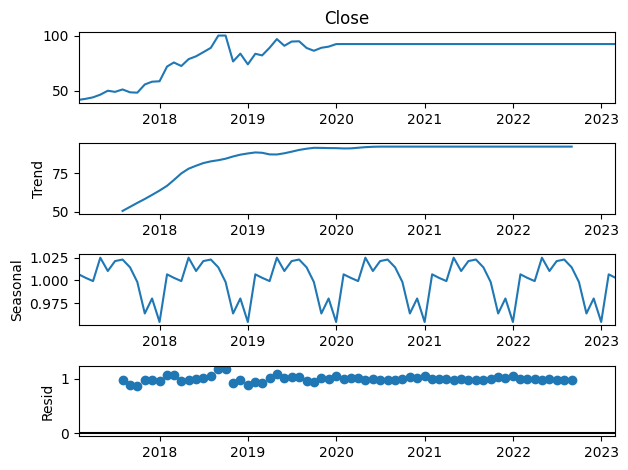

In [402]:
# Decompose the stock price to its components:
# Stock price= Trend+Seasonal+Error
series_close=dfs['Close']
series_close.index=pd.to_datetime(series_close.index)
# Correct the starting and final dates of stock price (dfs.head(1) and dfs.tail(1))
idx=pd.date_range('2017-01-04 00:00:00+00:00','2023-03-23 00:00:00+00:00',freq='M')
series_close=series_close.reindex(idx,method='pad')
series_close=series_close.astype('float32')
series_close.shape
decomposed = seasonal_decompose(series_close,model='multiplicative')
fig = decomposed.plot()

<Axes: title={'center': 'Close Prices Trend of Stock'}>

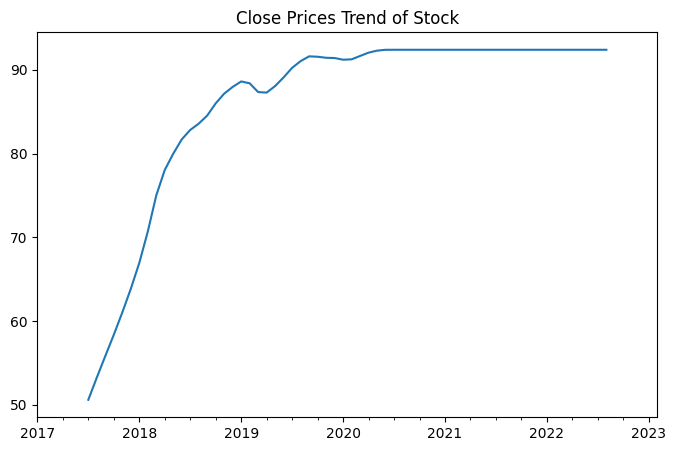

In [403]:
#Question 9:  Plot Trend component of stock data and explain the your findings
decomposed.trend.plot(figsize=(8,5),title='Close Prices Trend of Stock')



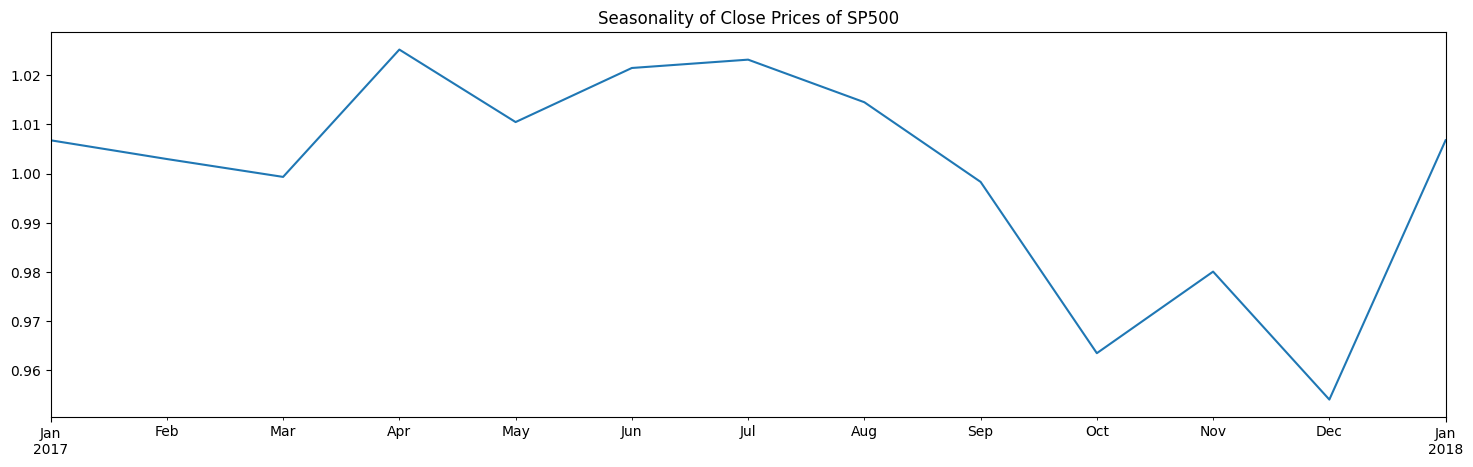

In [404]:
# Question 10: Plot Seasonality component of stock data and explain the your findings
decomposed.seasonal[:13].plot(figsize=(18,5),title='Seasonality of Close Prices of SP500');



### Splitting the dataframe to make training dataset

Extracing High, Low, Close from the previous dataframe and load to other and discarding date.

In [405]:
#Extracing Close from the dataframe and discarding date.
df = dfs['Close'].to_frame()
df

,Close
Date,
2015-01-02 00:00:00-05:00,15.426000
2015-01-05 00:00:00-05:00,15.109500
2015-01-06 00:00:00-05:00,14.764500
2015-01-07 00:00:00-05:00,14.921000
2015-01-08 00:00:00-05:00,15.023000
...,...
2019-12-24 00:00:00-05:00,89.460503
2019-12-26 00:00:00-05:00,93.438499
2019-12-27 00:00:00-05:00,93.489998


In [406]:
# For the LSTM Model Splitting the dataframe to make training dataset.
# Use 80% of data as training data

PercentageIntrainingData=0.8

training_set = df.iloc[:round(len(df)*PercentageIntrainingData)].values
training_set

array([[15.42599964],
       [15.10949993],
       [14.76449966],
       ...,
       [73.08200073],
       [73.90100098],
       [75.09850311]])

In [407]:
# Scale data to the range (0,1)
#Question 11: Why we should scale data? How the MinMaxScaler function works?

scaler = MinMaxScaler(feature_range=(0, 1))
training_set = scaler.fit_transform(training_set)
 

In [408]:
### Select number of days we want to predict into the future and number of past days we want to use to predict the future

in_future = 10 # Number of days we want to predict into the future 
in_past = 30 # Number of past days we want to use to predict the future

# Here, we are going to make such arrangement with the training dataset that previous 120 Days will be used to predict the next 10 days.

trainX = [] 
trainY = []



for i in range(in_past, len(training_set) - in_future +1): 
    trainX.append(training_set[i - in_past:i, 0:training_set.shape[1]]) 
    trainY.append(training_set[i + in_future - 1:i + in_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape = {}.'.format(trainX.shape)) 
print('trainY shape = {}.'.format(trainY.shape))

trainX shape = (967, 30, 1).
trainY shape = (967, 1).


## LSTM Model 

### Preparing Keras Model.

In [409]:
model = Sequential()
#model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[0], trainX.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(100, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

#Question 13: Explain the structure of above deel plearning model. Explain the LSTM model

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 30, 50)            10400     
                                                                 
 lstm_21 (LSTM)              (None, 100)               60400     
                                                                 
 dropout_23 (Dropout)        (None, 100)               0         
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dropout_24 (Dropout)        (None, 100)               0         
                                                                 
 dense_24 (Dense)            (None, 1)                 101       
                                                                 
Total params: 81,001
Trainable params: 81,001
Non-tra

### Fitting the Model to the training dataset

In [410]:
# train model on full train set, with 80/20 CV split
history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/30
25/25 [==============================] - 3s 32ms/step - loss: 0.0422 - accuracy: 0.0000e+00 - val_loss: 0.1110 - val_accuracy: 0.0052
Epoch 2/30
25/25 [==============================] - 1s 20ms/step - loss: 0.0061 - accuracy: 0.0000e+00 - val_loss: 0.1303 - val_accuracy: 0.0052
Epoch 3/30
25/25 [==============================] - 0s 20ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0334 - val_accuracy: 0.0052
Epoch 4/30
25/25 [==============================] - 1s 20ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0488 - val_accuracy: 0.0052
Epoch 5/30
25/25 [==============================] - 1s 20ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0636 - val_accuracy: 0.0052
Epoch 6/30
25/25 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0187 - val_accuracy: 0.0052
Epoch 7/30
25/25 [==============================] - 0s 20ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0155 - val_ac

### Ploting the accuracy and valid accuracy so as to observe the learning of the Model.


Mean_loss: 0.32%

Mean_val_loss: 3.25%


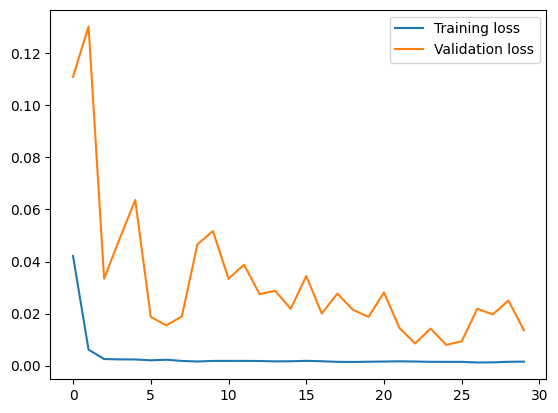

In [411]:
Mean_loss = np.mean(history.history['loss'])
print("\n%s: %.2f%%" % ('Mean_loss', Mean_loss*100))
Mean_val_loss= np.mean(history.history['val_loss'])
print("\n%s: %.2f%%" % ('Mean_val_loss', Mean_val_loss*100))

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

#Question 14: Explain the accuracy plots for training and validation sets



### Create test dataset and Prediction

In [412]:
test_data =df.iloc[round(len(df)*PercentageIntrainingData):,:].values
scaler = MinMaxScaler(feature_range=(0, 1))
test_data = scaler.fit_transform(test_data)

prediction_stocks = []

for i in range(in_past, len(test_data)):
    prediction_stocks.append(test_data[i-in_past:i])
    
prediction_stocks = np.array(prediction_stocks)
#Now we are going to feed in the prediction dataset to the model.
predictions = model.predict(prediction_stocks)

7/7 [==============================] - 0s 7ms/step


In [413]:
prediction_stocks.shape

(222, 30, 1)

In [414]:
# The predicted data need's to be invert transformed so that the values returns into the original scale.
y_pred_future = scaler.inverse_transform(predictions)
#Taking these predicted data and making it into dataframe so that it can be interpret.
df_forecast = pd.DataFrame({'Date':dfs.Date[-y_pred_future.shape[0]:],'Close':y_pred_future[:,0]})
df_forecast

,Date,Close
Date,,
2019-02-14 00:00:00-05:00,2019-02-14 00:00:00-05:00,81.742661
2019-02-15 00:00:00-05:00,2019-02-15 00:00:00-05:00,81.650444
2019-02-19 00:00:00-05:00,2019-02-19 00:00:00-05:00,81.530487
2019-02-20 00:00:00-05:00,2019-02-20 00:00:00-05:00,81.452255
2019-02-21 00:00:00-05:00,2019-02-21 00:00:00-05:00,81.386505
...,...,...
2019-12-24 00:00:00-05:00,2019-12-24 00:00:00-05:00,89.330170
2019-12-26 00:00:00-05:00,2019-12-26 00:00:00-05:00,89.490097
2019-12-27 00:00:00-05:00,2019-12-27 00:00:00-05:00,89.838844


In [415]:
# Ploting the predicted 'Close' Stock Price with Original 'Close' Stock Price
# 
import plotly.graph_objs as go

fig2=go.Figure(data=[go.Scatter(name = 'Close',x= dfs['Date'],y= dfs['Close']),
                   go.Scatter(name = 'Close_Predicted',x= df_forecast['Date'],y= df_forecast['Close'])])
fig2.show()

In [416]:
# #Question 15:  Calculate the residual and plot time series of residuals and explain your findings 


# Cross-validation
Keras allows us to make use of cross-validation for training our model. So we will use this to train and assess our first model.

### Create Deep learning model
For this task, You must keep the model architecture pretty simple. 
The following function allows to parameterise the choice of hyperparameters in the deep learning. It will come in super handy when we move onto tuning our parameters later.

In [417]:
def create_model(optimizer='adam', dropout=0.1,act='relu',dense_layer_sizes=[1], init='uniform', nbr_features=trainX.shape[0], dense_nparams=3):
    model = Sequential()
    model.add(LSTM(dense_nparams, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(dense_nparams, activation='relu', return_sequences=False))
    model.add(Dropout(dropout))

    for i in range(1,len(dense_layer_sizes)):
        model.add(Dense(dense_layer_sizes[i], activation=act))
        model.add(Dropout(dropout) )

    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer,metrics=["accuracy"])
    return model

In [418]:
##Question 15:  Explain briefly create_model function, (why we need this function?, inputs, output, how it works?)

##  Grid and randomized search
###  batch size and epochs
We can see from the graph above that we might be training our network for too long. Let's use **grid search** to find out what the optimal values for `batch_size` and `epochs` are.

 **Please note, you will obtian the best structure for each specification of the model, you should use the best parameter for the nest step**

In [419]:
##Question 16:  Explain briefly the batch_size and epochs and why we should find optimum value of them?



### Optimization Algorithm

In [420]:
##Question 17:Explain briefly the Optimization Algorithm and why we should try several Optimization Algorithms?


### Dropout

In [421]:
###Question 16: why we should use Dropout?

In [422]:
###Question 17: Explain how 'Dropout' works ?

### Hidden neurons

In [423]:
###Question 18: Explain how we can determine the opimum number of hidden layers?

In [424]:
# The best model according to the grid search
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)


# Set the number of days we want to predict into the future and the number of past days we want to use to predict the future
in_future = 10
in_past = 30

# Load and preprocess the data
PercentageIntrainingData=0.8
training_set = df.iloc[:round(len(df)*PercentageIntrainingData)].values

trainX = []
trainY = []

for i in range(in_past, len(training_set) - in_future + 1):
    trainX.append(training_set[i - in_past:i, :])
    trainY.append(training_set[i + 1:i + in_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

# Define parameters
activation_function = 'relu'
batch_size = 32
dense_layer_sizes = (20, 10)
dropout = 0.0
epochs = 50
optimizer = 'Nadam'

# Define model architecture
model = Sequential()
model.add(LSTM(64, activation=activation_function, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation=activation_function, return_sequences=False))
model.add(Dropout(dropout))

for i in range(len(dense_layer_sizes)):
    model.add(Dense(dense_layer_sizes[i], activation=activation_function))
    model.add(Dropout(dropout))

model.add(Dense(1))
    
# Compile model
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

# Print model summary
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 30, 64)            16896     
                                                                 
 lstm_23 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 20)                1300      
                                                                 
 dropout_26 (Dropout)        (None, 20)                0         
                                                                 
 dense_26 (Dense)            (None, 10)                210       
                                                                 
 dropout_27 (Dropout)        (None, 10)              

In [425]:
# train model on full train set, with 80/20 CV split
BestGridSearch = model.fit(trainX, trainY, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
25/25 [==============================] - 4s 28ms/step - loss: 1521.6261 - mae: 33.0342 - mse: 1521.6261 - val_loss: 476.7036 - val_mae: 17.5510 - val_mse: 476.7036
Epoch 2/50
25/25 [==============================] - 0s 17ms/step - loss: 795.4855 - mae: 21.7785 - mse: 795.4855 - val_loss: 2617.6821 - val_mae: 38.5212 - val_mse: 2617.6821
Epoch 3/50
25/25 [==============================] - 0s 18ms/step - loss: 791.6862 - mae: 18.8429 - mse: 791.6862 - val_loss: 2760.1914 - val_mae: 44.0278 - val_mse: 2760.1914
Epoch 4/50
25/25 [==============================] - 0s 18ms/step - loss: 21631.4883 - mae: 95.7016 - mse: 21631.4883 - val_loss: 11632.9678 - val_mae: 91.6938 - val_mse: 11632.9678
Epoch 5/50
25/25 [==============================] - 0s 19ms/step - loss: 1063.1864 - mae: 22.8159 - mse: 1063.1864 - val_loss: 1617.2983 - val_mae: 34.3887 - val_mse: 1617.2983
Epoch 6/50
25/25 [==============================] - 0s 19ms/step - loss: 139.7057 - mae: 8.9277 - mse: 139.7057 - val


Mean_loss: 52992.26%

Mean_val_loss: 49144.11%


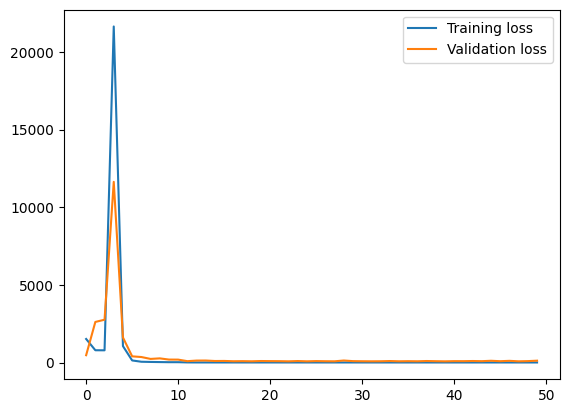

In [426]:
Mean_loss = np.mean(BestGridSearch.history['loss'])
print("\n%s: %.2f%%" % ('Mean_loss', Mean_loss*100))
Mean_val_loss= np.mean(BestGridSearch.history['val_loss'])
print("\n%s: %.2f%%" % ('Mean_val_loss', Mean_val_loss*100))

plt.plot(BestGridSearch.history['loss'], label='Training loss')
plt.plot(BestGridSearch.history['val_loss'], label='Validation loss')
plt.legend();

# Output Final Predictions

In [427]:
# Set the number of days we want to predict into the future and the number of past days we want to use to predict the future
in_future = 10
in_past = 30

# Load and preprocess the data
PercentageIntrainingData=0.8

# Load and preprocess the testing data
testing_set = df.iloc[round(len(df)*PercentageIntrainingData):].values

testX = []
testY = []

for i in range(in_past, len(testing_set) - in_future + 1):
    testX.append(testing_set[i - in_past:i, :])
    testY.append(testing_set[i + 1:i + in_future, 0])

testX, testY = np.array(testX), np.array(testY)

In [428]:
len(testing_set)


252

In [429]:
testY.shape

(213, 9)

In [430]:
testing_set

array([[ 76.95649719],
       [ 75.01399994],
       [ 78.76950073],
       [ 81.47550201],
       [ 82.82900238],
       [ 82.97100067],
       [ 82.81099701],
       [ 82.02799988],
       [ 80.86049652],
       [ 83.72799683],
       [ 84.18900299],
       [ 84.66100311],
       [ 84.80999756],
       [ 81.60849762],
       [ 82.00099945],
       [ 82.74649811],
       [ 83.52850342],
       [ 81.89450073],
       [ 79.69400024],
       [ 83.52149963],
       [ 85.93650055],
       [ 81.31150055],
       [ 81.66549683],
       [ 82.94049835],
       [ 82.01300049],
       [ 80.71849823],
       [ 79.41100311],
       [ 79.55000305],
       [ 81.90049744],
       [ 82.        ],
       [ 81.13249969],
       [ 80.39749908],
       [ 81.3789978 ],
       [ 81.10500336],
       [ 80.97200012],
       [ 81.57800293],
       [ 81.65000153],
       [ 81.81999969],
       [ 82.05449677],
       [ 81.99150085],
       [ 83.58650208],
       [ 84.8085022 ],
       [ 84.62149811],
       [ 83

In [431]:
prediction_testY = model.predict(testX)
prediction_testY

7/7 [==============================] - 0s 6ms/step


array([[ 91.95238 ],
       [ 96.11915 ],
       [ 94.014275],
       [ 93.20672 ],
       [ 93.815315],
       [ 94.368065],
       [ 91.55826 ],
       [ 90.918884],
       [ 86.446915],
       [ 83.19469 ],
       [ 82.53128 ],
       [ 84.3617  ],
       [ 85.39143 ],
       [ 92.83031 ],
       [ 92.4083  ],
       [ 81.30748 ],
       [ 81.81403 ],
       [ 89.5019  ],
       [ 84.40493 ],
       [ 83.62721 ],
       [ 83.87938 ],
       [ 79.68739 ],
       [ 81.7625  ],
       [ 81.97867 ],
       [ 83.19208 ],
       [ 90.05525 ],
       [ 92.88593 ],
       [ 89.7581  ],
       [ 82.868004],
       [ 85.770386],
       [ 92.278496],
       [ 93.58756 ],
       [ 93.139946],
       [ 94.846954],
       [ 97.06681 ],
       [ 98.31294 ],
       [ 97.90724 ],
       [ 95.12345 ],
       [ 87.97807 ],
       [ 87.88954 ],
       [ 86.610664],
       [ 89.37507 ],
       [ 97.242584],
       [100.10034 ],
       [101.57923 ],
       [102.38027 ],
       [102.99575 ],
       [104.9

In [432]:
# Comparing predictions with actual values
prediction_testY.shape == testY[:,1:2].shape

True

In [433]:
testY[:,1:2]

array([[ 81.3789978 ],
       [ 81.10500336],
       [ 80.97200012],
       [ 81.57800293],
       [ 81.65000153],
       [ 81.81999969],
       [ 82.05449677],
       [ 81.99150085],
       [ 83.58650208],
       [ 84.8085022 ],
       [ 84.62149811],
       [ 83.44750214],
       [ 81.29750061],
       [ 81.04000092],
       [ 83.53099823],
       [ 83.65499878],
       [ 84.54049683],
       [ 84.31099701],
       [ 85.61799622],
       [ 87.10749817],
       [ 88.09249878],
       [ 89.8635025 ],
       [ 90.96299744],
       [ 88.2385025 ],
       [ 88.71299744],
       [ 89.18800354],
       [ 88.28500366],
       [ 88.67099762],
       [ 89.03749847],
       [ 90.70950317],
       [ 90.6989975 ],
       [ 91.03500366],
       [ 90.94300079],
       [ 91.86399841],
       [ 92.49299622],
       [ 91.79199982],
       [ 92.36650085],
       [ 92.20349884],
       [ 92.15299988],
       [ 92.24349976],
       [ 93.15200043],
       [ 93.24099731],
       [ 93.08450317],
       [ 94

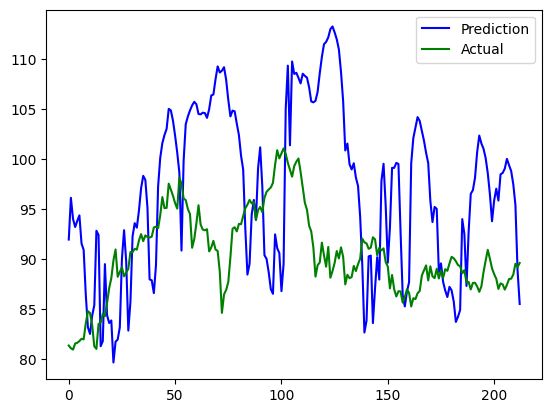

In [434]:
import matplotlib.pyplot as plt

# Plot the data
plt.plot(prediction_testY, color='blue', label='Prediction')
plt.plot(testY[:,1:2], color='green', label='Actual')
#plt.plot(testing_set, color='red', label='Other TestY')
plt.legend()
plt.show()


In [435]:
#Now the same graph but with prediction of all times


In [436]:
import matplotlib.pyplot as plt

data = df.iloc[:].values

# Reshape the input data to match the shape of the input data used to train the model
X = []
for i in range(in_past, len(data)):
    X.append(data[i-in_past:i, :])

X = np.array(X)

# Use the model to predict the output for the entire dataset plus 10 days into the future
prediction = model.predict(X)


39/39 [==============================] - 0s 6ms/step


In [437]:
prediction.shape

(1228, 1)

In [438]:
data.shape

(1258, 1)

In [439]:
len(data)

1258

In [440]:
# Moving the prediction in_past days + 1 and asigning to predictionss before plotting:
predictionss = prediction
moving_window = in_past + 1

import numpy as np

# Create an array of 30 NaN values with shape (30, 1)
nan_array = np.empty((moving_window, 1))
nan_array[:] = np.nan

# Concatenate the NaN array with the original predictions array
predictionss = np.concatenate((nan_array, predictionss), axis=0)

# Check the new shape of the predictions array
print(predictionss.shape)  # Output: (1571, 1)


(1259, 1)


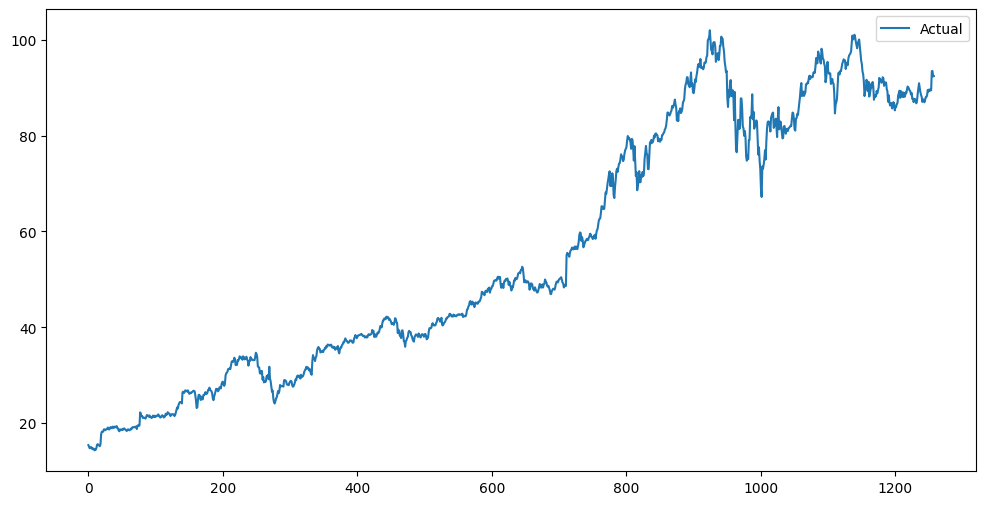

In [441]:
# Plot the predicted values against the actual values to compare them
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual')
plt.legend()
plt.show()

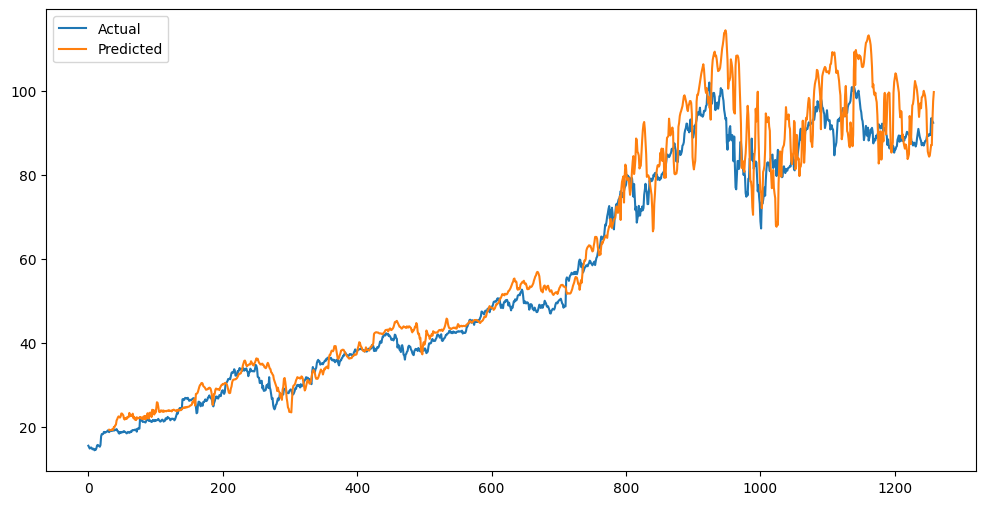

In [442]:
# Plot the predicted values against the actual values to compare them
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual')
plt.plot(predictionss, label='Predicted')
plt.legend()
plt.show()

In [443]:
len(prediction)-len(data)

-30

# Now is time to use our model to make money with the maket!

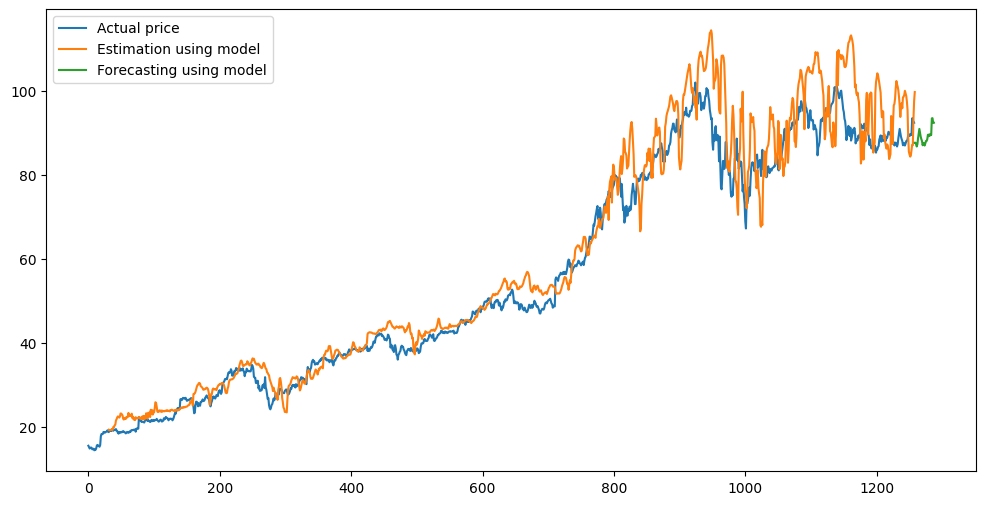

In [444]:
# Days in future desired to predict
number_of_days_forecast = 30
# Initial data to use
data2 = df.iloc[:].values
data2 = np.array([data2], dtype=object)

# Preparing the steps for the loop
for i in range(in_past, number_of_days_forecast):
    # Predicting preparing X
    X = []
    for i in range(in_past, len(data2)):
        X.append(data2[i-in_past:i, :])
    X = np.array(X)
    # Applying the model (Predict)
    prediction2 = model.predict(X)
    # Extracting tomorrow
    tomorrow = prediction2[-1]
    # Adding tomorrow to the list originally empty created
    data2 = np.append(data2, tomorrow)


# Extracting only the forecasts
forecasts_to_trade = data2[:,-number_of_days_forecast:]
forecasts_to_trade = np.squeeze(forecasts_to_trade)
forecasts_to_trade = np.reshape(forecasts_to_trade, (number_of_days_forecast,1))

# Adding at the beggining of the array some NAN Values to be able to plot
# Create an array of 30 NaN values with shape (30, 1)
nan_array = np.empty((len(data), 1))
nan_array[:] = np.nan

# Concatenate the NaN array with the original predictions array
forecasts_to_trade = np.concatenate((nan_array, forecasts_to_trade), axis=0)


#Plotting the results of forecasting
# Plot the predicted values against the actual values to compare them
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual price')
plt.plot(predictionss, label='Estimation using model')
plt.plot(forecasts_to_trade, label='Forecasting using model')
plt.legend()
plt.show()

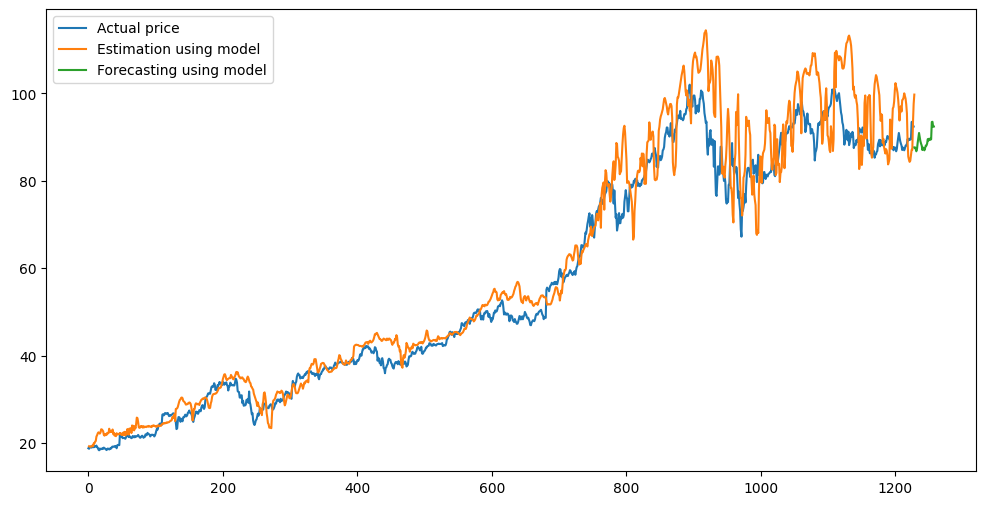

In [445]:
# Days in future desired to predict
number_of_days_forecast = 30
# Initial data to use
data2 = df.iloc[:].values
data2 = np.array([data2], dtype=object)

# Preparing the steps for the loop
for i in range(in_past, number_of_days_forecast):
    # Predicting preparing X
    X = []
    for i in range(in_past, len(data2)):
        X.append(data2[i-in_past:i, :])
    X = np.array(X)
    # Applying the model (Predict)
    prediction2 = model.predict(X)
    # Extracting tomorrow
    tomorrow = prediction2[-1]
    # Adding tomorrow to the list originally empty created
    data2 = np.append(data2, tomorrow)


# Extracting only the forecasts
forecasts_to_trade = data2[:,-number_of_days_forecast:]
forecasts_to_trade = np.squeeze(forecasts_to_trade)
forecasts_to_trade = np.reshape(forecasts_to_trade, (number_of_days_forecast,1))

# Adding at the beggining of the array some NAN Values to be able to plot
# Create an array of 30 NaN values with shape (30, 1)
nan_array = np.empty((len(data), 1))
nan_array[:] = np.nan

# Concatenate the NaN array with the original predictions array
forecasts_to_trade = np.concatenate((nan_array, forecasts_to_trade), axis=0)


#Plotting the results of forecasting
# Plot the predicted values against the actual values to compare them
plt.figure(figsize=(12, 6))
plt.plot(data[30:, :], label='Actual price')
plt.plot(predictionss[30:, :], label='Estimation using model')
plt.plot(forecasts_to_trade[30:, :], label='Forecasting using model')
plt.legend()
plt.show()

In [446]:
forecasts_to_trade

array([[nan],
       [nan],
       [nan],
       ...,
       [93.48999786376953],
       [92.34449768066406],
       [92.39199829101562]], dtype=object)

In [447]:
data

array([[15.42599964],
       [15.10949993],
       [14.76449966],
       ...,
       [93.48999786],
       [92.34449768],
       [92.39199829]])

In [448]:
predictionss

array([[        nan],
       [        nan],
       [        nan],
       ...,
       [93.32182312],
       [97.56414795],
       [99.71388245]])

## Calculation of prediction interval(90% confidence level)

** For 90% confidence level, t-multiplier is 1.645 which is calculated from degree of freedom of the sample.


t-multiplier(1.645) * standard deviation(stdev) gives the magnitude of interval.

The minimum and maximum range is given by :
confidence min = value-interval
confidence max = value + interval

In [449]:
## Your code
Best_y_pred_future = predictionss[31:, :]
real_y = data[30:, :]
real_y = np.array(real_y)
Best_df_forecast = forecasts_to_trade[30:, :]
Best_df_forecast = np.array(Best_df_forecast)

In [450]:
Best_y_pred_future.shape

(1228, 1)

In [451]:
real_y.shape

(1228, 1)

In [452]:
Best_df_forecast.shape

(1258, 1)

In [453]:
sum_err = np.sum((real_y-Best_y_pred_future)**2)

print(sum_err)

x = (1/(len(Best_df_forecast))*sum_err)

stdev = np.sqrt(x)

interval = 	1.645*stdev

print(interval)

54615.98485392117
10.838906412606839


In [454]:
np.sum((real_y-Best_y_pred_future))

-3880.66770362854

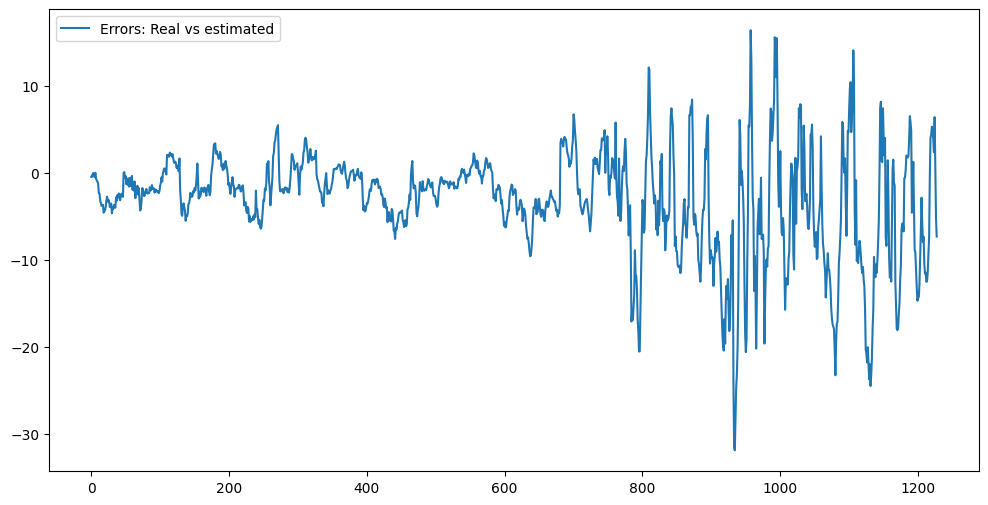

In [455]:
Errors = (real_y-Best_y_pred_future)
#Plotting the results of forecasting
# Plot the predicted values against the actual values to compare them
plt.figure(figsize=(12, 6))
plt.plot(Errors, label='Errors: Real vs estimated')
plt.legend()
plt.show()

** Adding the Close Confidence Min and Close Confidence Max to the dataframe, Plus the original closing price data too.

In [456]:
pesimist_scenario = Best_df_forecast - interval
optimist_scenario = Best_df_forecast + interval
optimist_scenario


array([[nan],
       [nan],
       [nan],
       ...,
       [104.32890427637636],
       [103.1834040932709],
       [103.23090470362246]], dtype=object)

** Ploting the Closing Price(Original and Predicted) with the Close Confidence Min as 'Lower Bound' and Close Confidence Max as 'Upper Bound' which gives the idea of the Model's 90% Confidence Level.

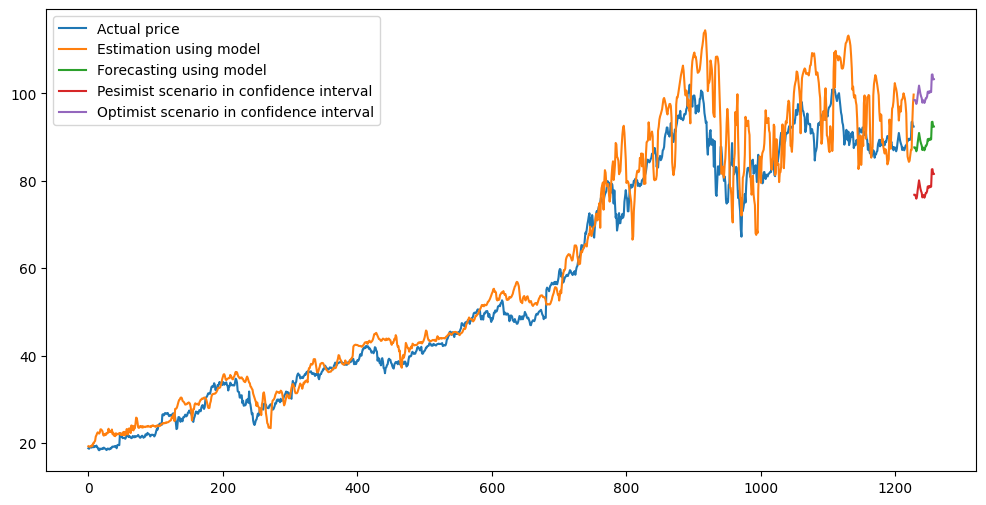

In [457]:
#Plotting the results of forecasting
# Plot the predicted values against the actual values to compare them
plt.figure(figsize=(12, 6))
plt.plot(real_y, label='Actual price')
plt.plot(Best_y_pred_future, label='Estimation using model')
plt.plot(Best_df_forecast, label='Forecasting using model')
plt.plot(pesimist_scenario, label='Pesimist scenario in confidence interval')
plt.plot(optimist_scenario, label='Optimist scenario in confidence interval')
plt.legend()
plt.show()

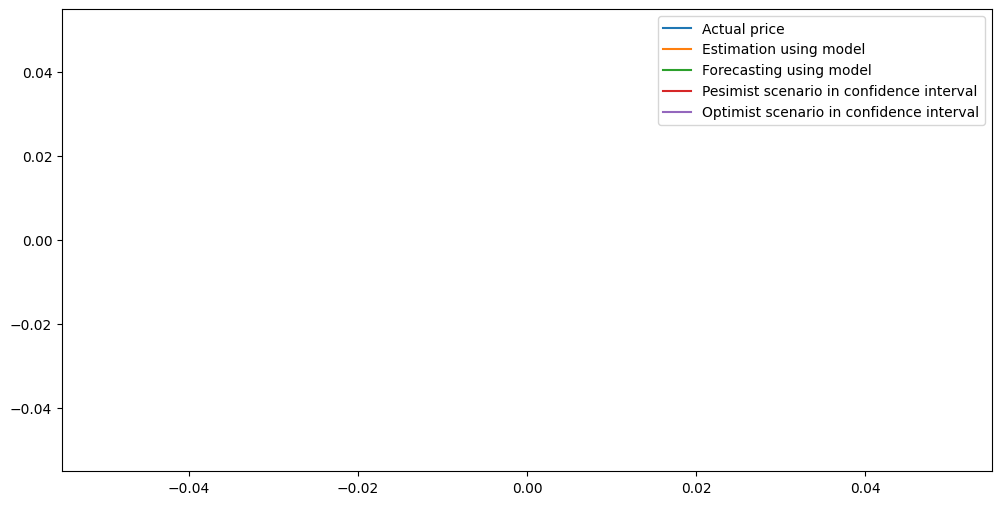

In [458]:
#Plotting the results of forecasting
# Plot the predicted values against the actual values to compare them
plt.figure(figsize=(12, 6))
plt.plot(real_y[1400:, :], label='Actual price')
plt.plot(Best_y_pred_future[1400:, :], label='Estimation using model')
plt.plot(Best_df_forecast[1400:, :], label='Forecasting using model')
plt.plot(pesimist_scenario[1400:, :], label='Pesimist scenario in confidence interval')
plt.plot(optimist_scenario[1400:, :], label='Optimist scenario in confidence interval')
plt.legend()
plt.show()